# Spatial Integral Plots

## Imports, Declarations, and Definitions

In [37]:
import matplotlib.pyplot as plt
import numpy as np
from sympy import re, symbols

import spatial_integral as spint

In [11]:
eps = symbols('eps')

In [12]:
def real_finite_part(expr):
    """Return the real finite part of a Laurent series"""
    return re(expr.subs(eps, 0))

## Generate Data

In [35]:
px_grid = np.arange(-5, 6, 0.25)
deltas = 2, 2, 2

In [36]:
spint_vals_psd = [spint.use_psd([px, 0, 0], [px, 0, 0], *deltas) for px in px_grid]
spint_vals_tplquad = [spint.use_tplquad([px, 0, 0], [px, 0, 0], *deltas) for px in px_grid]

In [38]:
spint_vals_psd_re_fin = np.array([real_finite_part(x) for x in spint_vals_psd])
spint_vals_tplquad_re_fin = np.array([x[0].real for x in spint_vals_tplquad])

TODO: Write data to file.

In [45]:
spint_plot_data = {
    'px_grid': px_grid,
    'spint_vals_psd_re_fin': spint_vals_psd_re_fin,
    'spint_vals_tplquad_re_fin': spint_vals_tplquad_re_fin
}

# Plot Data

In [48]:
scale = 1e3

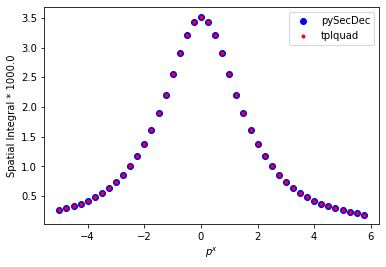

In [54]:
fig, ax = plt.subplots()
ax.scatter(spint_plot_data['px_grid'], spint_plot_data['spint_vals_psd_re_fin'] * scale,
    label='pySecDec', color='blue', marker='o')
ax.scatter(spint_plot_data['px_grid'], spint_plot_data['spint_vals_tplquad_re_fin'] * scale,
    label='tplquad', color='red', marker='.')
ax.set_xlabel(r'$p^x$')
ax.set_ylabel(f'Spatial Integral * {scale}')
ax.legend(loc='upper right')